In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white')

# Setting Custom colors
my_colors = ["#ff6e54", "#ffa600", "#ff2e63", "#a3f7bf", "#9378ff", "#56e39f", "#ff67ab", "#5e2ca5", "#ffd166", "#00b4d8", "#4ecdc4", "#f8edeb"]
# Create a seaborn palette object
my_palette = sns.color_palette(my_colors)
# Use the custom palette with a seaborn function
sns.set_palette(my_palette)
from matplotlib.colors import ListedColormap
colors = ['#ffc3a0', '#ffafcc', '#bde0fe', '#ffabab']
my_cmap = sns.color_palette(colors)
cmap = ListedColormap(colors)

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split #train test division to see the model accuracy
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb

In [2]:
DATA = pd.read_csv('country-data.csv')

In [3]:
DATA.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


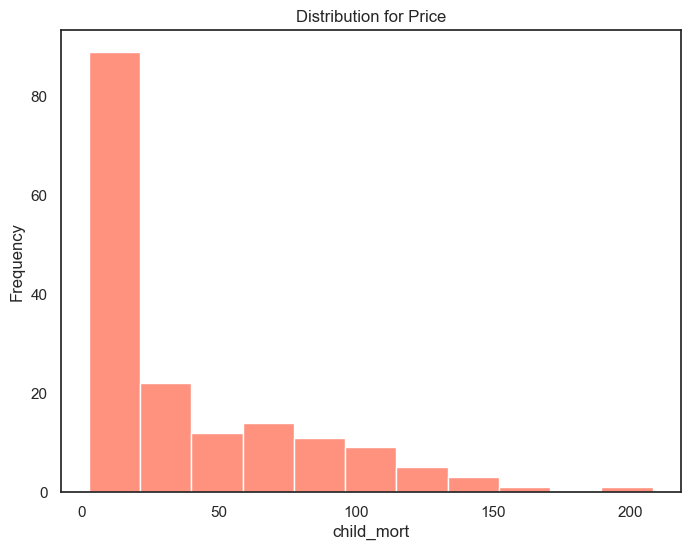

In [6]:
plt.figure(figsize=[8, 6])
sns.histplot(DATA['child_mort'])
plt.title('Distribution for Price')
plt.xlabel('child_mort')
plt.ylabel('Frequency')

plt.show();

In [4]:
DATA['country']

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [5]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
DATA.isnull().mean()

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [7]:
DATA.duplicated().sum()

0

In [8]:
DATA['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [9]:
DATA['country'].value_counts()

country
Afghanistan    1
Morocco        1
Myanmar        1
Namibia        1
Nepal          1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zambia         1
Name: count, Length: 167, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoder = LabelEncoder()

In [12]:
print(label_encoder)

LabelEncoder()


In [13]:
DATA['country']= label_encoder.fit_transform(DATA['country'])

In [14]:
DATA.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [15]:
DATA.dtypes

country         int32
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

# MODEL

In [16]:
X = DATA.drop(['child_mort'], axis=1)
y = DATA['child_mort']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.cluster import KMeans

In [19]:
kmeans=KMeans(n_clusters= 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(DATA)

In [20]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [22]:
predicted_labels = kmeans.predict(DATA)


In [21]:
# Get the cluster centroids
centroids = kmeans.cluster_centers_
print(centroids)

In [ ]:
#alternative elbow method is hierarchical clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
